<a href="https://colab.research.google.com/github/debasisb/COVID-19/blob/master/Covid_19_Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [0]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

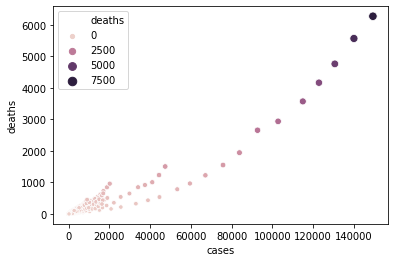

In [0]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2020-04-08', '2020-04-08', '2020-04-08', '2020-04-08',
               '2020-04-08', '2020-04-08', '2020-04-08', '2020-04-08',
               '2020-04-08', '2020-04-08'],
              dtype='datetime64[ns]', name='date', length=2049, freq=None)

In [0]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2020-04-10
Two days ago 2020-04-08


In [0]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2020-04-08,Alabama,1,2499,67
2020-04-08,Alaska,2,224,5
2020-04-08,Arizona,4,2726,80
2020-04-08,Arkansas,5,1077,18
2020-04-08,California,6,19043,506


In [25]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

NameError: ignored

In [24]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

NameError: ignored

In [23]:
current_df.shape

NameError: ignored

In [22]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

NameError: ignored

In [21]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

NameError: ignored

In [0]:
set(top_states_df.state.values)

{'California',
 'Connecticut',
 'Georgia',
 'Illinois',
 'Louisiana',
 'Massachusetts',
 'Michigan',
 'New Jersey',
 'New York',
 'Washington'}

<Figure size 1080x360 with 0 Axes>

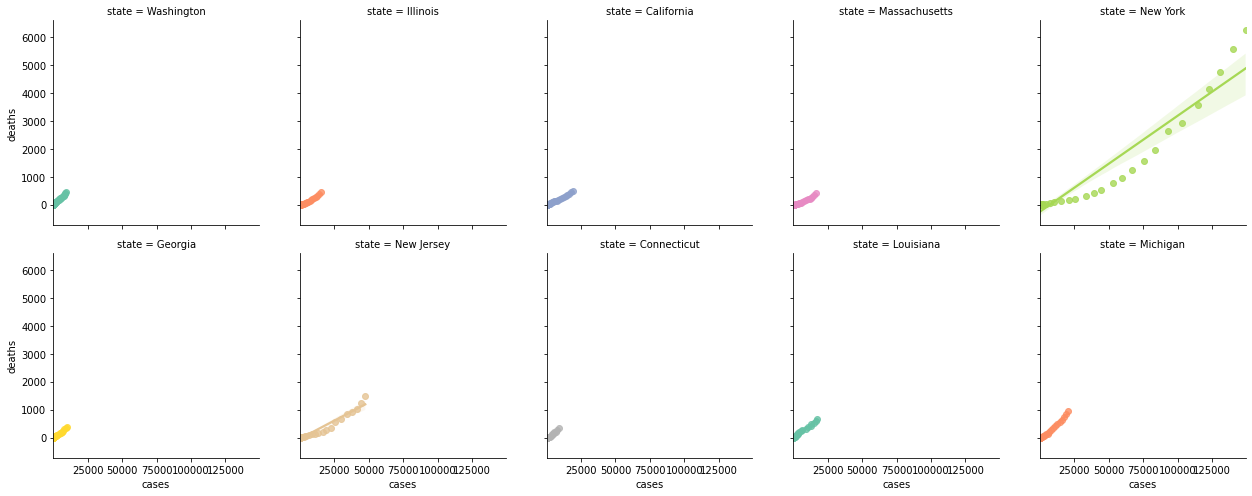

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [0]:
top_states_april_current_df = top_states_df.loc["2020-04-08":today].sort_values(by=["deaths", "cases"], ascending=False)
top_states_april_current_df.head()

,state,cases,deaths
date,,,
2020-04-08,New York,149401,6268
2020-04-08,New Jersey,47437,1504
2020-04-08,Michigan,20220,959
2020-04-08,Louisiana,17030,652
2020-04-08,California,19043,506


In [0]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_april_current_df, x=top_states_march_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

Import County Level Data for Hawaii

In [60]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df["state"].shape
df = df[df["state"] == "Hawaii"]
df.tail(10)

,date,county,state,fips,cases,deaths
41227,2020-04-08,Hawaii,Hawaii,15001.0,26,0
41228,2020-04-08,Honolulu,Hawaii,15003.0,328,4
41229,2020-04-08,Kauai,Hawaii,15007.0,18,0
41230,2020-04-08,Maui,Hawaii,15009.0,54,1
41231,2020-04-08,Unknown,Hawaii,NaN,7,0
43793,2020-04-09,Hawaii,Hawaii,15001.0,28,0
43794,2020-04-09,Honolulu,Hawaii,15003.0,334,4
43795,2020-04-09,Kauai,Hawaii,15007.0,18,0
43796,2020-04-09,Maui,Hawaii,15009.0,57,2
43797,2020-04-09,Unknown,Hawaii,NaN,3,0


In [66]:
Maui_County_df = df[df["county"]== "Maui"].drop(columns = "fips")
Maui_County_df.tail(25)

,date,county,state,cases,deaths
2866,2020-03-16,Maui,Hawaii,2,0
3354,2020-03-17,Maui,Hawaii,3,0
3916,2020-03-18,Maui,Hawaii,3,0
4592,2020-03-19,Maui,Hawaii,5,0
5392,2020-03-20,Maui,Hawaii,5,0
6326,2020-03-21,Maui,Hawaii,7,0
7374,2020-03-22,Maui,Hawaii,9,0
8528,2020-03-23,Maui,Hawaii,11,0
9793,2020-03-24,Maui,Hawaii,11,0
11181,2020-03-25,Maui,Hawaii,13,0


<Figure size 1800x1800 with 0 Axes>

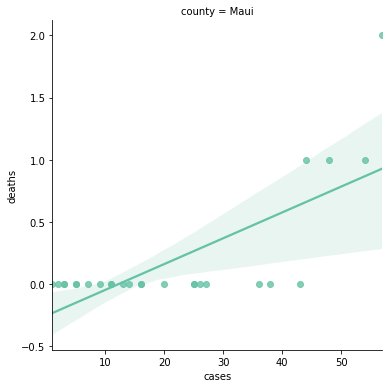

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
ax = sns.lmplot(x="cases", y="deaths",
                    height=5.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Maui_County_df)
ax.fig.subplots_adjust(wspace=.2)